In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2

import os
import sys
import subprocess as sb
import warnings
warnings.filterwarnings('ignore')

from rich import print as rprint
import torch
pd.set_option("display.max_columns", None)
import tensorflow as tf

from piq import brisque
import torchvision.transforms as T

2025-12-17 22:20:23.950709: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-17 22:20:23.990509: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-17 22:20:24.988195: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
import numpy as np
from IPython.display import Audio

# Generate a 440 Hz beep for 1 second
def play():
        
    sr = 44100  # sample rate
    duration = 1  # seconds
    t = np.linspace(0, duration, int(sr * duration), endpoint=False)
    wave = 0.5 * np.sin(2 * np.pi * 440 * t)
    
    return Audio(wave, rate=sr, autoplay=True)


In [4]:
pwd

'/home/prithwijit/programming/python/imp_projects/age_gender_project/notebooks'

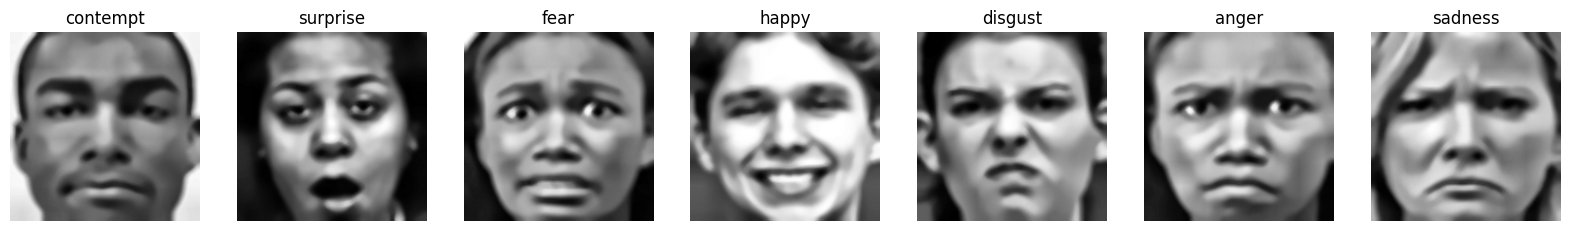

In [6]:
data_path = 'age_emotion_detection/processed_data/train/'
data_path_test = 'age_emotion_detection/processed_data/test/'

fig, ax = plt.subplots(1,7, figsize=(20, 3))
for num, image in enumerate(os.listdir(data_path)):
    ax[num].imshow(plt.imread(data_path + image + '/' + os.listdir(data_path + image)[0]), cmap = 'gray')
    ax[num].axis('off')
    ax[num].set_title(image)

plt.show()

### ***Image preprocessing***

In [7]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
# eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

In [8]:
def is_blurry(image_path):
    image = Image.open(image_path).convert('RGB')
    transform = T.ToTensor()
    image_tensor = transform(image).unsqueeze(0) # Add batch dimension
    
    # Calculate BRISQUE score
    try:
        quality_score = brisque(image_tensor, data_range=1.0)
        # Lower score = better perceptual quality
        return quality_score.item()
    except:
        return 255


def resize_image(img, size=(200, 200)):
    """Resize image to AlexNet input size."""
    return cv2.resize(img, size, interpolation=cv2.INTER_CUBIC)

    
def apply_filters(img, methods=["gaussian", "median", "bilateral", "fastNlMeans"]):
    """Apply filtering to remove noise."""

    filtered = img.copy()
    if "bilateral" in methods:
        filtered = cv2.bilateralFilter(filtered, d=9, sigmaColor=75, sigmaSpace=75)
    if "fastNlMeans" in methods:
        filtered = cv2.fastNlMeansDenoising(img, None, h=10, templateWindowSize=7, searchWindowSize=21)
    if "gaussian" in methods:
        filtered = cv2.GaussianBlur(filtered, (5, 5), 0)
    if "median" in methods:
        filtered = cv2.medianBlur(filtered, 5)
    return filtered


def enhance_contrast(img):
    """Use histogram equalization to enhance pixel intensity."""
    # return cv2.equalizeHist(img)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    return clahe.apply(img)

In [9]:
def preprocess(image_path):
    if is_blurry(image_path) > 60:
        return False
    else:
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # faces = face_cascade.detectMultiScale(gray, scaleFactor=1.01)
        
        # for (x, y, w, h) in faces:
        #     roi_gray = gray[max(0,y-20):max(200,y+h+20), max(0,x-20):max(200,x+w+20)]
        return enhance_contrast(apply_filters(resize_image(gray)))

In [10]:
# sb.run("mkdir fer_2013\\train", text = True, shell = True)
# for folder in os.listdir(data_path):
#     sb.run(f"mkdir fer_2013\\train\\{folder}", text = True, shell = True)
#     for image in os.listdir(os.path.join(data_path, folder)):
#         image_path = os.path.join(data_path, folder, image)
#         processed_img = preprocess(image_path)
#         if np.sum(processed_img):
#             cv2.imwrite(f'fer_2013\\train\\{folder}\\' + image_path.split('\\')[-1], processed_img)
#         else:
#             continue
#     rprint(f'folder ---> {folder} completed')

In [11]:
# sb.run("mkdir fer_2013\\validation", text = True, shell = True)
# for folder in os.listdir(data_path_test):
#     sb.run(f"mkdir fer_2013\\validation\\{folder}", text = True, shell = True)
#     for image in os.listdir(os.path.join(data_path_test, folder)):
#         image_path = os.path.join(data_path_test, folder, image)
#         processed_img = preprocess(image_path)
#         if np.sum(processed_img):
#             cv2.imwrite(f'fer_2013\\validation\\{folder}\\' + image_path.split('\\')[-1], processed_img)
#         else:
#             continue
#     rprint(f'folder ---> {folder} completed')

In [12]:
# cv2.imread('output.png', cv2.IMREAD_GRAYSCALE).shape

In [13]:
# emotion_dict = {'anger': [], 'contempt':[], 'disgust':[], 'fear':[], 'happy':[], 'sadness':[], 'surprise': []}
# for folder in os.listdir('processed_data'):
#     for image in os.listdir(os.path.join('processed_data', folder)):
#         emotion_dict[folder].append(image.split('_')[0])

# for i in emotion_dict:
#     print(len(emotion_dict[i]))
#     emotion_dict[i] = set(emotion_dict[i])

In [14]:
# for i in emotion_dict:
#     print(len(emotion_dict[i]))

In [15]:
# for folder in os.listdir(data_path):
#     count = 0
#     for image in os.listdir(os.path.join(data_path, folder)):
#         count += 1

#     print (count)

In [16]:
# sb.run("mkdir -p processed_data/test", text = True, shell = True)
# for folder in os.listdir('processed_data/train/'):
#     sb.run(f"mkdir -p processed_data/test/{folder}", text = True, shell = True)
#     for image in os.listdir(os.path.join('processed_data/train/', folder))[:10]:
#         sb.run(f"mv processed_data/train/{folder}/{image} processed_data/test/{folder}/{image}", shell = True, text = True)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.2)
val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_data = train_datagen.flow_from_directory(batch_size = 64, directory = 'age_emotion_detection/processed_data/train', color_mode = 'rgb', shuffle = True, target_size=(200,200), subset = "training", class_mode = 'categorical')
val_data = train_datagen.flow_from_directory(batch_size = 64, directory = 'age_emotion_detection/processed_data/train', color_mode = 'rgb', shuffle = False, target_size=(200,200), subset = "validation", class_mode = 'categorical')

# val_data = val_datagen.flow_from_directory(batch_size = 32, directory = 'fer_2013\\validation', color_mode = 'rgb', shuffle = False, target_size=(200,200), class_mode = 'categorical')
# test_data = test.flow_from_directory(batch_size = 32, directory = 'processed_data/test', color_mode = 'rgb', shuffle = False, target_size=(200,200), class_mode = 'categorical')

Found 729 images belonging to 7 classes.
Found 179 images belonging to 7 classes.


In [18]:
from keras import layers, Model
from keras.applications import VGG19, EfficientNetV2B0, InceptionResNetV2

In [19]:
base = EfficientNetV2B0(input_shape = (200,200,3), include_top=False, weights='imagenet')
base.trainable = True

x = layers.GlobalAveragePooling2D()(base.output)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(train_data.num_classes, activation = 'softmax')(x)

2025-12-17 22:29:54.301972: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [20]:
model = Model(base.input, outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, epochs = 20, validation_data=val_data)
play()

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 77s 4s/step - accuracy: 0.6529 - loss: 1.0467 - val_accuracy: 0.0503 - val_loss: 2.1226
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 49s 4s/step - accuracy: 0.9451 - loss: 0.2317 - val_accuracy: 0.0503 - val_loss: 2.2936
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - accuracy: 0.9396 - loss: 0.1668 - val_accuracy: 0.0503 - val_loss: 2.5262
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - accuracy: 0.9520 - loss: 0.1452 - val_accuracy: 0.0503 - val_loss: 2.7511
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.9835 - loss: 0.0684 - val_accuracy: 0.0503 - val_loss: 2.4520
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - accuracy: 0.9794 - loss: 0.0693 - val_accuracy: 0.1117 - val_loss: 2.6981
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - accuracy: 0.9863 - loss: 0.0408 - val_accuracy: 0.0503 - val_loss: 2.4473
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.9877 - loss: 0.0401 - val_accuracy: 0.0503 - val_loss:

In [19]:
loss, acc = model.evaluate(test_data)
print("Test acc:", acc)

NameError: name 'test_data' is not defined

In [ ]:
pred = model.predict(test_data)

In [ ]:
np.argmax(pred, axis = 1)

In [ ]:
test_data.labels

In [ ]:
sns